# CTS Data

(1)	What customers are saying about each Primary Reason category?

(2)	Are there any topics that are not currently identified as Primary Reasons, but which occur frequently in customer comments?

CTS Data – Claims Transactional Survey, 9,739 records (data from 2019 – 2020)
- Field	Type	Description
- CTS Resp ID	Numeric	Unique primary key for each CTS survey
- CTS Interview End Date	Date	Date the survey was completed
- CTS Prim Reason	Text	The primary reason selected
- CTS - Reason Comments	Text	The comment regarding the primary reason



In [141]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set()
#%matplotlib inline

In [142]:
df = pd.read_csv('Data/CTS Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 5 columns):
CTS ID                    9739 non-null int64
CTS Resp ID               9739 non-null int64
CTS Interview End Date    9739 non-null object
CTS - Prim Reason         9739 non-null object
CTS - Reason Comments     9726 non-null object
dtypes: int64(2), object(3)
memory usage: 380.6+ KB


In [143]:
df = df.rename(columns={'CTS - Reason Comments': 'Comments', 'CTS - Prim Reason': 'Reason', 'CTS Interview End Date': 'Date'})
df.head()

CTS ID  CTS Resp ID       Date Reason Comments
0  2       1441039      1/21/2019  '-     '-     
1  3       1441589      1/7/2019   '-     '-     
2  4       1441903      1/8/2019   '-     '-     
3  5       1442068      1/9/2019   '-     '-     
4  6       1442301      1/1/2019   '-     '-

In [144]:
df['Comments'] = df['Comments'].fillna("")

In [145]:
df.isna().sum()

CTS ID         0
CTS Resp ID    0
Date           0
Reason         0
Comments       0
dtype: int64

In [79]:
df['Reason'].value_counts()

Representative's friendly and caring service    3581
Time to Handle/Resolve Claim                    2139
Satisfaction with settlement                    1280
Ease of Reporting Claim                         1234
Other                                           679 
Representative knowledge                        398 
Interaction with service provider               396 
'-                                              17  
Website                                         10  
Mobile App                                      5   
Name: Reason, dtype: int64

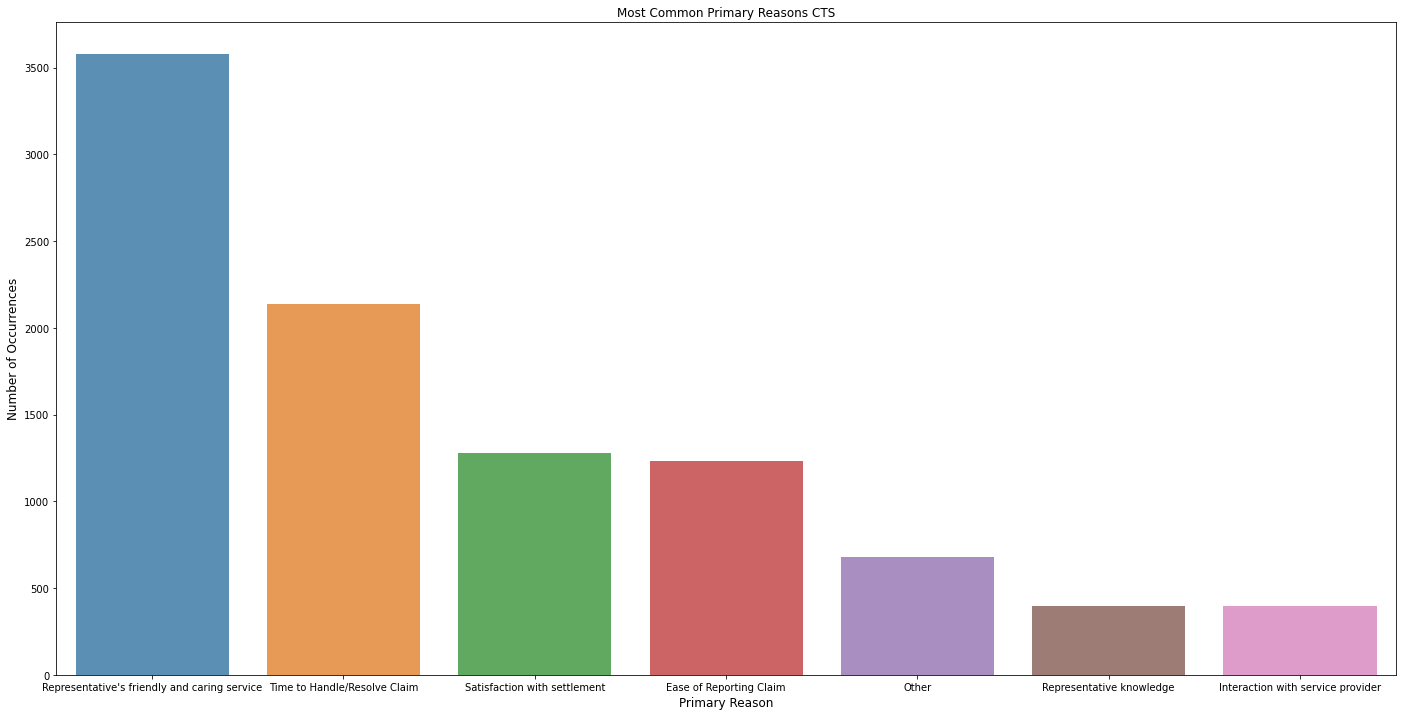

In [102]:
# '-' - 17
# website - 10
# mobile app - 5
# Other - 679
cts_reasons = df['Reason'].value_counts()
cts_reasons = cts_reasons[:7]
plt.figure(figsize=(24,12))
sns.barplot(cts_reasons.index, cts_reasons.values, alpha=0.8)
plt.title('Most Common Primary Reasons CTS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Primary Reason', fontsize=12)
plt.show()

# Date

In [177]:
df['Date']

0       2019-01-21
1       2019-01-07
2       2019-01-08
3       2019-01-09
4       2019-01-01
           ...    
9734    2019-11-21
9735    2019-11-23
9736    2019-11-20
9737    2019-11-20
9738    2019-11-13
Name: Date, Length: 9739, dtype: object

In [175]:
#df['Date'] = df['Date'].dt.date
beg = df['Date'].min()
end = df['Date'].max()
print(f'The surveys were conducted {beg} to {end}.')

The surveys were conducted 2019-01-01 to 2019-12-31.


<AxesSubplot:title={'center':'Number of Surveys Per Month'}, xlabel='Month', ylabel='Survey Count'>

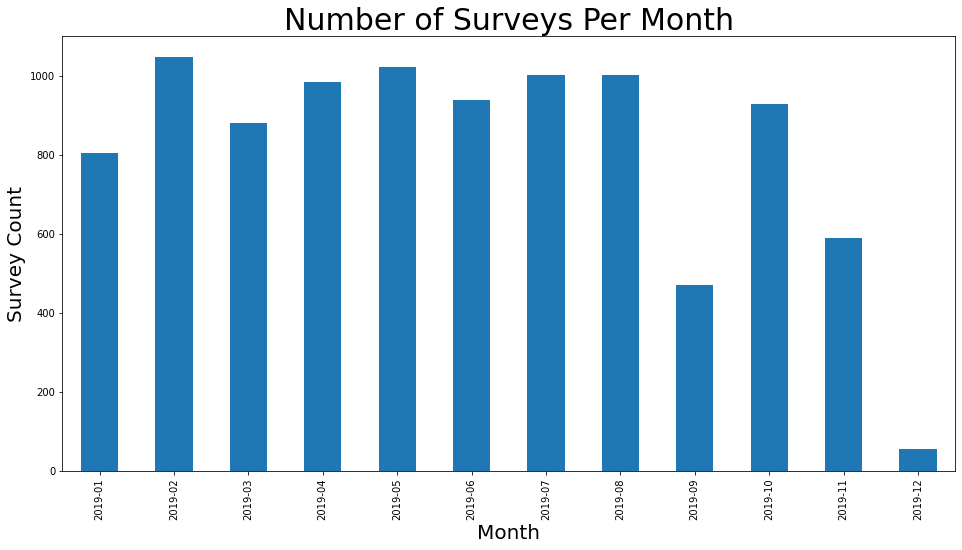

In [198]:
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')
months = df['month'].sort_values()
start_month = months.iloc[0]
end_month = months.iloc[-1]
index = pd.period_range(start=start_month, end=end_month)
plt.figure(figsize=(16,8))
plt.xlabel('Month', size=20)
plt.ylabel('Survey Count', size = 20)
plt.title('Number of Surveys Per Month', size = 30)
df.groupby('month')['Reason'].count().reindex(index).plot.bar()

# Word Count

In [56]:
df['word_count'] = df['Comments'].apply(lambda x: len(str(x).split(" ")))
df[['Comments', 'word_count']].head(10)

Comments  \
0  '-                                                                                                                   
1  '-                                                                                                                   
2  '-                                                                                                                   
3  '-                                                                                                                   
4  '-                                                                                                                   
5  '-                                                                                                                   
6  '-                                                                                                                   
7  '-                                                                                                                   
8  Ms. Bradshaw has been very pleasant to work with. She has reached out to me to make sure everything is going fine.   
9  '-                                                                                                                   

   word_count  
0  1           
1  1           
2  1           
3  1           
4  1           
5  1           
6  1           
7  1           
8  22          
9  1

# Human Names
- named entity recognition, locate and classify named entities mentioned in unstructured text into pre-defined categories such as - person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages,

In [57]:
import pandas as pd
# for natural language processing: named entity recognition
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
# for visualizations
%matplotlib inline

In [58]:
tokens = nlp(''.join(str(df.Comments.tolist())))

In [59]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('Amica', 1863),
 ('AMICA', 356),
 ('first', 129),
 ('one', 73),
 ('Rep', 41),
 ('many years', 27),
 ('10', 26),
 ('two', 24),
 ('second', 21),
 ('years', 17),
 ('1', 17),
 ('the years', 17),
 ('Quick', 17),
 ('30 years', 16),
 ('100%', 16),
 ('2', 16),
 ('a week', 15),
 ('a few days', 14),
 ('3', 14),
 ('the next day', 13)]

In [60]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(500)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [63]:
df_person['word_count'] = df_person['text'].apply(lambda x: len(str(x).split(" ")))
#df_full_names = df_person[df_person['word_count']>=2]
df_full_names = df_full_names.loc[df_full_names['word_count'] >=2]
df_full_names.head(40)

text  count  word_count
23   Paul Faulstich        4      2         
26   Kelly Short           4      2         
28   Susan Marsh           3      2         
55   Karen Kask            2      2         
56   John O'Brien          2      2         
57   Cynthia Shipley       2      2         
59   Robert Furtado        2      2         
60   Lori Deluca           2      2         
66   Sandra Lima           2      2         
71   Cindy Mitchell        2      2         
72   Anne Meinking         2      2         
75   Eric Ernst            2      2         
78   Lanesheia White       2      2         
82   Kim Cisneros          2      2         
85   Karol Gardner         2      2         
86   Alysia Giaconetti     2      2         
90   Amy Marvin            2      2         
91   Megan Clark           2      2         
92   Ann Marie             2      2         
94   Andrew Scott          2      2         
95   Amica Representative  2      2         
97   Laurie Anne           2      2         
99   Chad Zellmer          2      2         
100  Brenda Smith          2      2         
102  Jennifer Hutchinson   2      2         
103  Elizabeth Flores      2      2         
104  Rosalinda Silva       2      2         
107  Renee Amazing         2      2         
109  Mrs Dainello          2      2         
111  Ben Crockford         1      2         
112  Lori Willis           1      2         
113  Chris Foss            1      2         
114  Jamal Barber          1      2         
115  Kimberly Brown        1      2         
118  Elizabeth Hitchens    1      2         
120  Billy Joe Blackstone  1      3         
121  Darnell Hester's      1      2         
122  Darnell Hester        1      2         
124  Cynthia Cook          1      2         
125  Jessica Ramos         1      2

# Contractions

In [36]:
import re
def clean(text):
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"Isn't", "is not", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)  
    text = re.sub(r"donå«t", "do not", text)  
    
    return text

df['Comments'] = df['Comments'].apply(lambda x: clean(x))
df['Comments'].head(20)

0     '-                                                                                                                                                                                    
1     '-                                                                                                                                                                                    
2     '-                                                                                                                                                                                    
3     '-                                                                                                                                                                                    
4     '-                                                                                                                                                                                    
5     '-                                               

# Make Lowercase

In [37]:
df['Comments'] = df['Comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Comments'].head(20)

0     '-                                                                                                                                                                                   
1     '-                                                                                                                                                                                   
2     '-                                                                                                                                                                                   
3     '-                                                                                                                                                                                   
4     '-                                                                                                                                                                                   
5     '-                                                    

# Remove Stopwords

In [18]:
stop = stopwords.words('english')
df['Comments'] = df['Comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Comments'].head(20)

0                                                    '-
1                                                    '-
2                                                    '-
3                                                    '-
4                                                    '-
5                                                    '-
6                                                    '-
7                                                    '-
8     ms. bradshaw pleasant work with. reached make ...
9                                                    '-
10                                                   '-
11                                                   '-
12    ben crockford handled everything perfectly sta...
13    ease reporting claim; representative's friendl...
14                                                   '-
15                              always recommend amica.
16    agent lori willis made easy, thorough successf...
17                        prompt quick resolutio

# Remove Punctuation

In [19]:
df['Comments'] = df['Comments'].str.replace('[^\w\s]','')
df['Comments'].head(20)

0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
5                                                      
6                                                      
7                                                      
8     ms bradshaw pleasant work with reached make su...
9                                                      
10                                                     
11                                                     
12    ben crockford handled everything perfectly sta...
13    ease reporting claim representatives friendly ...
14                                                     
15                               always recommend amica
16    agent lori willis made easy thorough successfu...
17                        prompt quick resolutio

# Numerics Count

In [200]:
df['numerics'] = df['Comments'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Comments','numerics']].head()
df.head()

CTS ID  CTS Resp ID        Date Reason Comments    month  numerics
0  2       1441039      2019-01-21  '-     '-       2019-01  0       
1  3       1441589      2019-01-07  '-     '-       2019-01  0       
2  4       1441903      2019-01-08  '-     '-       2019-01  0       
3  5       1442068      2019-01-09  '-     '-       2019-01  0       
4  6       1442301      2019-01-01  '-     '-       2019-01  0

In [201]:
pd.set_option('display.max_colwidth', -1)
df_numeric = df.loc[df['numerics'] >= 1]
df_numeric[['Comments', 'numerics']].head()

Comments  \
29  As I said above not in once in 25 years of coverage was additional coverage discussed with me, therefore the coverage I had only replaced one wheelchair and a ceiling mounted police system. I had no money to replace any of my other belongings.                                                                                                                                                                                                                                                         
40  Very polite service.  I'd give a 10 but at the end there was a delay paying the final holdback that I don't believe was fully justified.  The garage cost 75k to rebuild and you covered half the amount which was fine.  Your agents saw the new garage in person.  Last agent took at least 4 weeks to verify the expenses were for the garage back and forth with the contractor.  Seems like a long time for $3k.  I have no complaint with any other part of the process. It was wonderful.  Thanks!   
48  We have had insurance coverage in RI and now FL for 45 years and have always had good experiences.                                                                                                                                                                                                                                                                                                                                                                                                          
68  Amica is just the best company in the insurance marketplace, fair and ethical,  with caring and knowledgeable Representatives.  I have been a satisfied customer or more than 40 years which is a recommendation in and of itself. (Most of my claim was processed by Jamal Barber. He was knowledgeable and always professional. My claim was completed by Kimberly Brown....a smooth transition.                                                                                                          
79  1 phone call and they took care of the rest                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

    numerics  
29  1         
40  2         
48  1         
68  1         
79  1

# Most Common Words

In [22]:
freq = pd.Series(' '.join(df['Comments']).split()).value_counts()[:30]
freq

amica             2266
claim             1722
service           1204
process           910 
easy              725 
would             653 
recommend         624 
great             619 
always            595 
helpful           548 
representative    535 
time              481 
handled           480 
friendly          460 
customer          458 
professional      456 
car               448 
insurance         440 
quick             430 
knowledgeable     424 
quickly           378 
company           370 
excellent         369 
claims            363 
everything        353 
made              340 
years             338 
work              328 
fast              312 
settlement        307 
dtype: int64

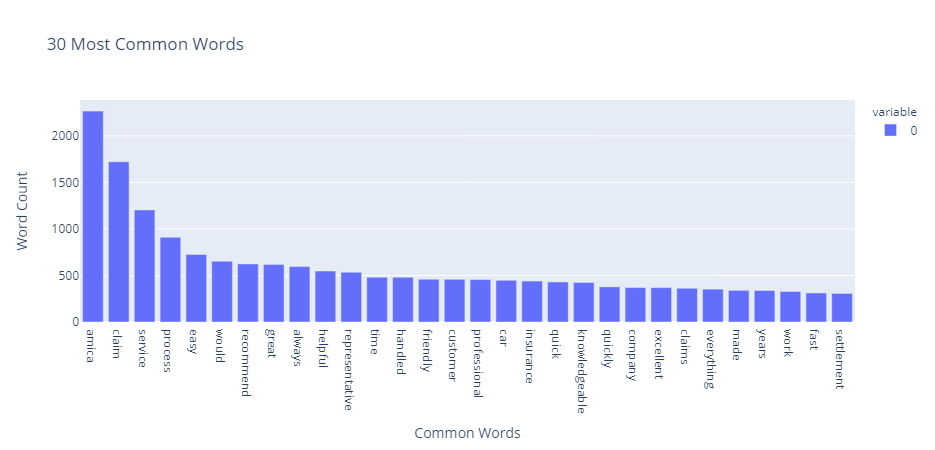

In [23]:
import plotly.express as px
fig = px.bar(freq, title="30 Most Common Words")
fig.update_layout(
    xaxis_title="Common Words",
    yaxis_title="Word Count")

fig.show()


# Least Common Words

In [24]:
freq2 = pd.Series(' '.join(df['Comments']).split()).value_counts()[-20:]
freq2

eminently        1
warm             1
drivethru        1
claiment         1
85               1
pressed          1
brianna          1
conroe           1
denise           1
doubtful         1
wednesdayvery    1
vettorino        1
mexico           1
shopes           1
companyprompt    1
bump             1
rubber           1
discontent       1
stall            1
fax              1
dtype: int64

# Sentiment Analysis

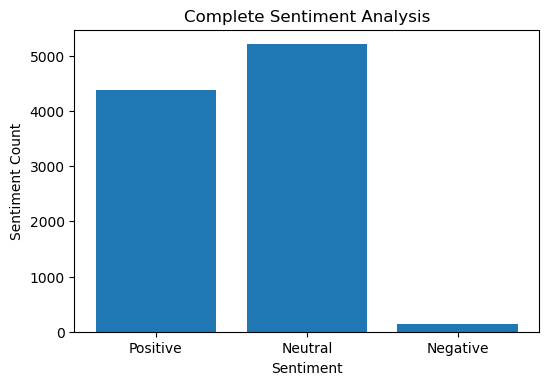

In [202]:
# look at best and worst comments 
from textblob import TextBlob
df['sentiment'] = df['Comments'].apply(lambda x: TextBlob(x).sentiment[0])
df[['Comments','sentiment']].head()

positive = df[df['sentiment'] >= .2]
neutral = df[(df['sentiment'] > -.2) & (df['sentiment'] < .2)]
negative = df[df['sentiment'] <= -.2]

sentiment_count = [positive.count()[0], neutral.count()[0], negative.count()[0]]
sentiment_name = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots(figsize=(6, 4), dpi=100)
axes.bar(sentiment_name,sentiment_count)
axes.set_xlabel('Sentiment')
axes.set_ylabel('Sentiment Count')
axes.set_title('Complete Sentiment Analysis')
plt.show()

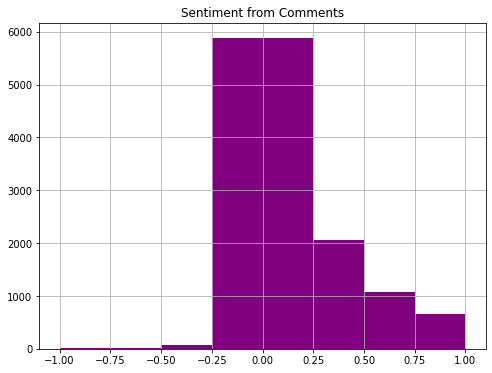

In [207]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram of the polarity values
df['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="purple")
plt.title("Sentiment from Comments")
plt.show()

df_Representative's friendly and caring service


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



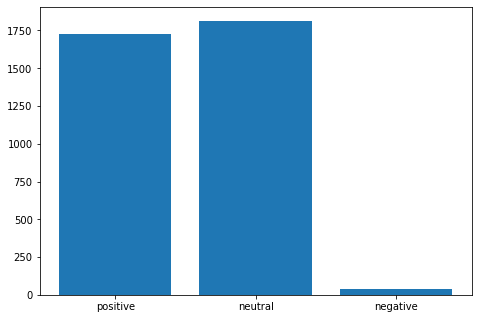

df_Time to Handle/Resolve Claim


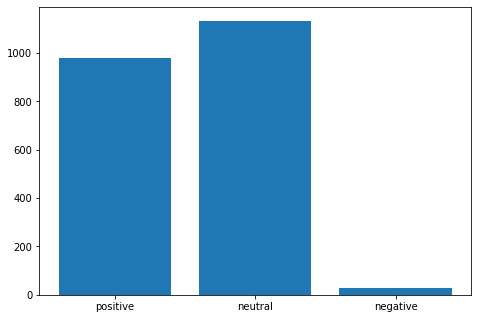

df_Satisfaction with settlement


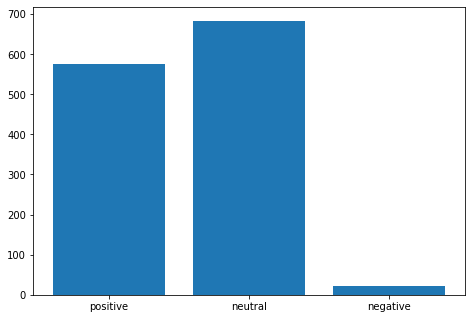

df_Ease of Reporting Claim


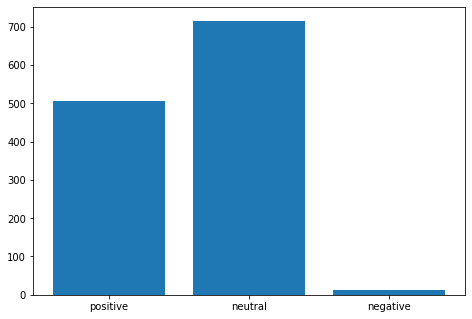

df_Other


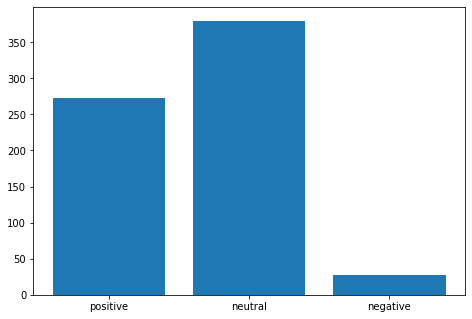

df_Representative knowledge


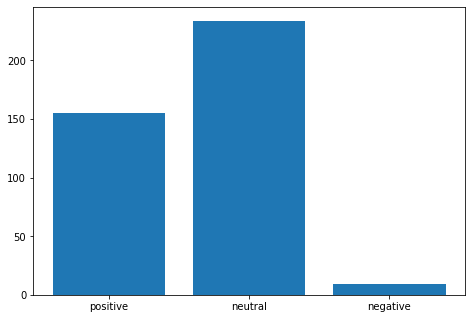

df_Interaction with service provider


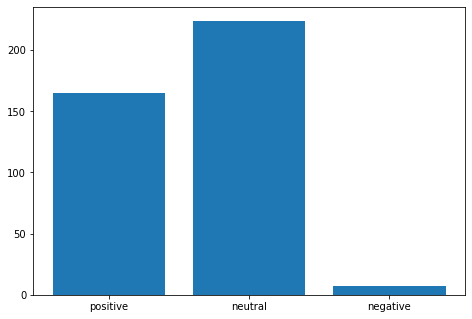

df_'-


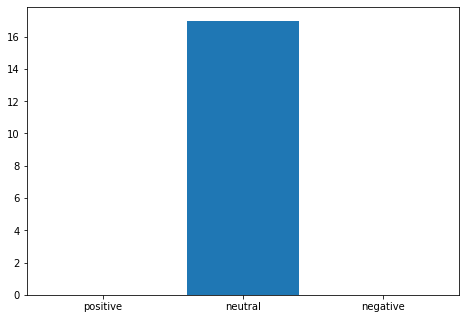

df_Website


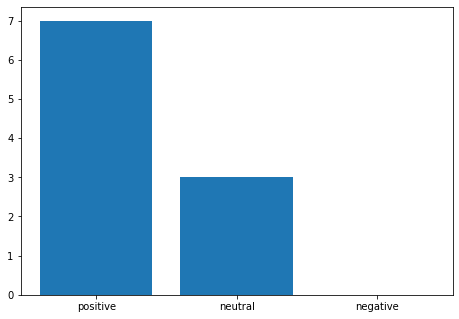

df_Mobile App


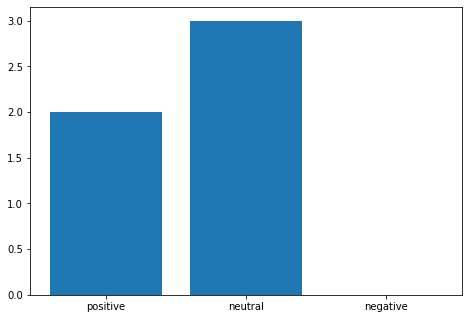

In [69]:
for reason in df['Reason'].value_counts().index:
    df_column = 'df_' + reason
    print(df_column)
    df_column = df.loc[df['Reason'] == reason]
    df_column['sentiment'] = df_column['Comments'].apply(lambda x: TextBlob(x).sentiment[0])
    
    positive = df_column.loc[df_column['sentiment'] >= .2]
    neutral = df_column.loc[(df_column['sentiment'] > -.2) & (df_column['sentiment'] < .2)]
    negative = df_column.loc[df_column['sentiment'] <= -.2]

    sentiment_count = [positive.count()[0], neutral.count()[0], negative.count()[0]]
    sentiment_name = ['positive', 'neutral', 'negative']
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(sentiment_name,sentiment_count)
    plt.show()

# Worst Comments

In [43]:
pd.set_option('display.max_colwidth', -1)
df_sorted_ascending = df.sort_values(by=['sentiment'])
df_sorted_ascending[['Comments', 'sentiment']].head(20)          

Comments  \
6697  this was the worst experience i ever had with amica .                                                                                                                                                                                                                                                                                                                                                                                                          
7611  helped me all the way through this horrible time and still there to assist                                                                                                                                                                                                                                                                                                                                                                                     
3338  the service provider you recommended was horrible and i still have issues with my car after 4 iterations of having it worked on.                                                                                                                                                                                                                                                                                                                               
6024  you are the worst company that i ever see you did not fight for me i do not know why i choose it 😡                                                                                                                                                                                                                                                                                                                                                             
488   horrible correspondance                                                                                                                                                                                                                                                                                                                                                                                                                                        
1054  read the bloody answer!                                                                                                                                                                                                                                                                                                                                                                                                                                        
326   he allowed me to retain my dignity after having done a really stupid thing!                                                                                                                                                                                                                                                                                                                                                                                    
9518  base on satisfaction i will recommend amica to my relatives and friends                                                                                                                                                                                                                                                                                                                                                                                        
5400  we have been with amica for over 30 years and have never been disappointed with the professionalize and care                                                                                                                                                                                                                                                  

# Best Comments

In [41]:
df_sorted_descending = df.sort_values(by=['sentiment'], ascending = False)
df_sorted_descending[['Comments', 'sentiment']].head(20)  

Comments  \
515   claim rep was prompt, knowledgeable and informative in her assistance with me with my claim. thoroughly explained my polcy's terms and conditions , the applicable deductible and policy limits. she portrayed excellent cs as a representative for the amica insurance company.   
6730  i have been a member for over 35 years. you guys are the best                                                                                                                                                                                                                      
4758  the service was the best experience i ever have had with an insurance company                                                                                                                                                                                                      
1153  sandra lima was excellent went out of her way                                                                                                                                                                                                                                      
6736  great folks!                                                                                                                                                                                                                                                                       
6758  excellent customer service                                                                                                                                                                                                                                                         
4706  amica is the best insurer in the usa in my opinion!                                                                                                                                                                                                                                
8729  they were wonderful and thorough                                                                                                                                                                                                                                                   
6763  best insurance company in the world                                                                                                                                                                                                                                                
8748  we have always been impressed by your reps service - even when we were once calling from the yukon!                                                                                                                                                                                
4633  the people of amica did a perfect job resolving this claim...start to finish! thank you. phil williams                                                                                                                                                                             
8754  amica has always been awesome. i have never once had an issue with them.                                                                                                                                                                                                           
7775  the choice of the inspection company was excellent.                                                                                                                                                                                                                                
8757  excellent and expedient service                                                                                                                                                                                                                                                    
4523  i have been with amica since 1971.

# Reason Other 

In [297]:
df_other = df[df['Reason'] == 'Other']
df_other.head()

CTS ID  CTS Resp ID CTS Interview End Date Reason  \
13  15      1443710      1/19/2019              Other   
15  17      1443713      1/16/2019              Other   
20  22      1443736      1/23/2019              Other   
29  31      1443774      1/23/2019              Other   
34  36      1443808      1/31/2019              Other   

                                                                                                                                                                                                                                                                                                                                                                                                       Comments  \
13  ease reporting claim representatives friendly caring service representative knowledge                                                                                                                                                                                                                                                                                                                         
15  always recommend amica                                                                                                                                                                                                                                                                                                                                                                                        
20  satisfied                                                                                                                                                                                                                                                                                                                                                                                                     
29  said 25 years coverage additional coverage discussed me therefore coverage replaced one wheelchair ceiling mounted police system money replace belongings                                                                                                                                                                                                                                                     
34  would recommend highly actually recently amica put customer first cared us claim handled well chris foss answered questions great patience amica able make difficult situation resolved timely fashion heard several neighbors experienced damage storm struggling get good customer service insurance companies saw frustration concern appreciate amica much relieving stress frustration whole situation   

    word_count  numerics  sentiment  
13  11          0         0.375      
15  5           0         0.000      
20  2           0         0.500      
29  44          1         0.000      
34  93          0         0.295

In [298]:
freq = pd.Series(' '.join(df_other['Comments']).split()).value_counts()[:30]
freq

amica             304
claim             149
recommend         132
would             112
service           89 
always            62 
insurance         55 
customer          55 
process           52 
company           52 
great             52 
car               48 
years             48 
time              40 
claims            36 
experience        36 
easy              35 
get               34 
excellent         33 
good              32 
one               32 
work              28 
never             27 
representative    26 
like              26 
see               26 
shop              25 
still             25 
best              24 
us                23 
dtype: int64

# Spelling Correction

In [299]:
from textblob import TextBlob
from wordcloud import STOPWORDS
from collections import defaultdict
#df_other['Comments'].apply(lambda x: str(TextBlob(x).correct()))

# N - Grams

In [300]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
df_unigrams = defaultdict(int)

for review in df['Comments']:
    for word in generate_ngrams(review):
        df_unigrams[word] += 1
        
df_unigrams = pd.DataFrame(sorted(df_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
df_bigrams = defaultdict(int)


for review in df['Comments']:
    for word in generate_ngrams(review, n_gram=2):
        df_bigrams[word] += 1

        
df_bigrams = pd.DataFrame(sorted(df_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
df_trigrams = defaultdict(int)


for review in df['Comments']:
    for word in generate_ngrams(review, n_gram=3):
        df_trigrams[word] += 1
        
df_trigrams = pd.DataFrame(sorted(df_trigrams.items(), key=lambda x: x[1])[::-1])


In [301]:
df_trigrams

0   1
0      always recommend amica      46
1      great customer service      43
2      claim handled quickly       38
3      recommend amica friends     37
4      excellent customer service  36
...                           ...  ..
45954  reached make sure           1 
45955  work reached make           1 
45956  pleasant work reached       1 
45957  bradshaw pleasant work      1 
45958  ms bradshaw pleasant        1 

[45959 rows x 2 columns]

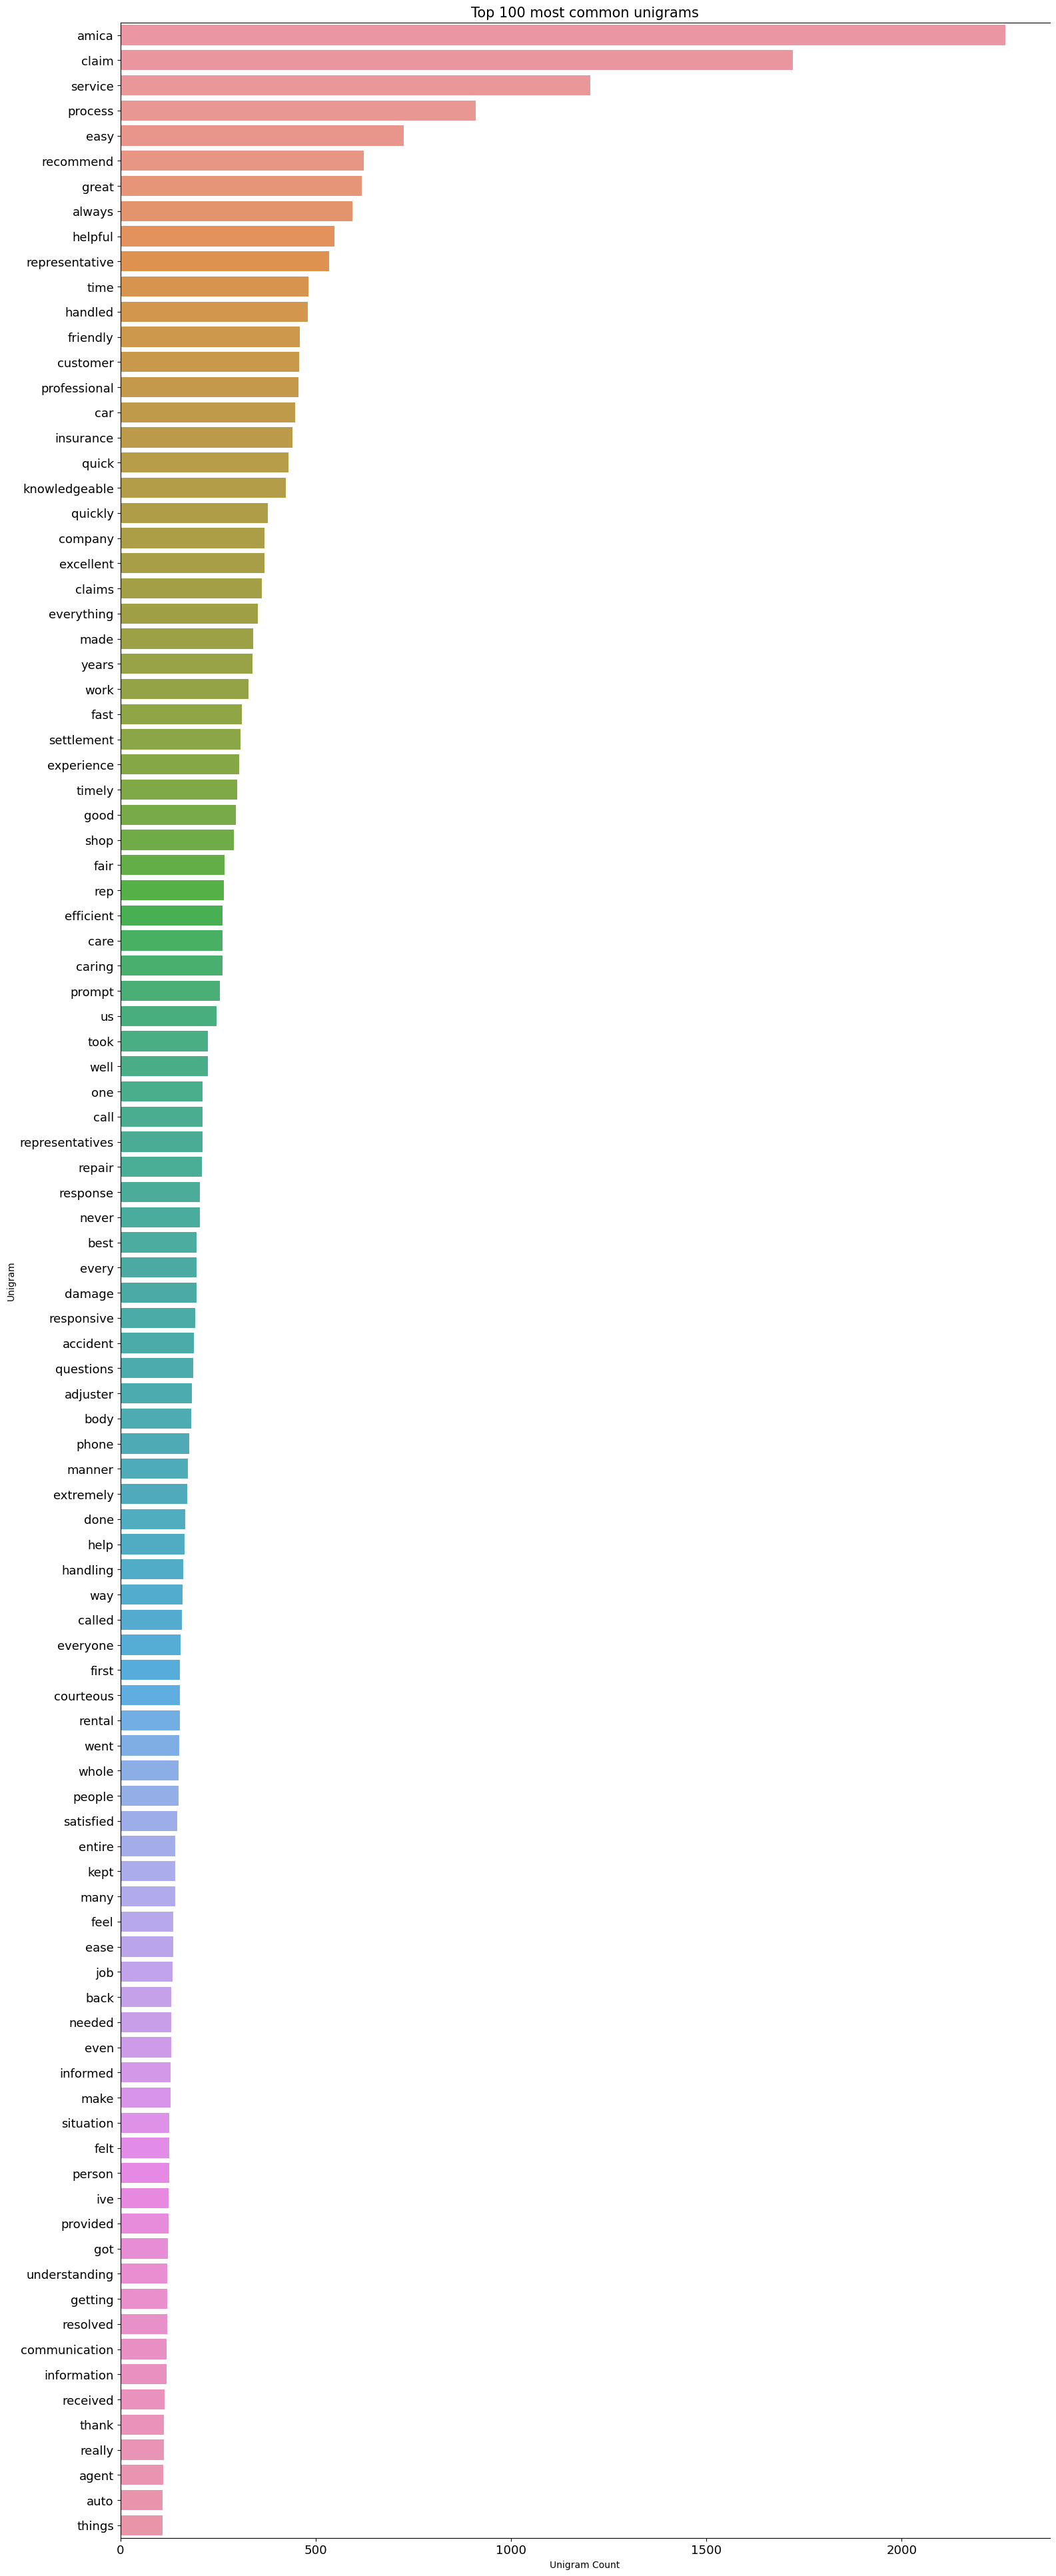

In [302]:
fig, axes = plt.subplots(figsize=(18, 50), dpi=100)
#plt.tight_layout()

sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N])



axes.spines['right'].set_visible(False)
axes.set_xlabel('Unigram Count')
axes.set_ylabel('Unigram')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)


axes.set_title(f'Top {N} most common unigrams', fontsize=15)


plt.show()

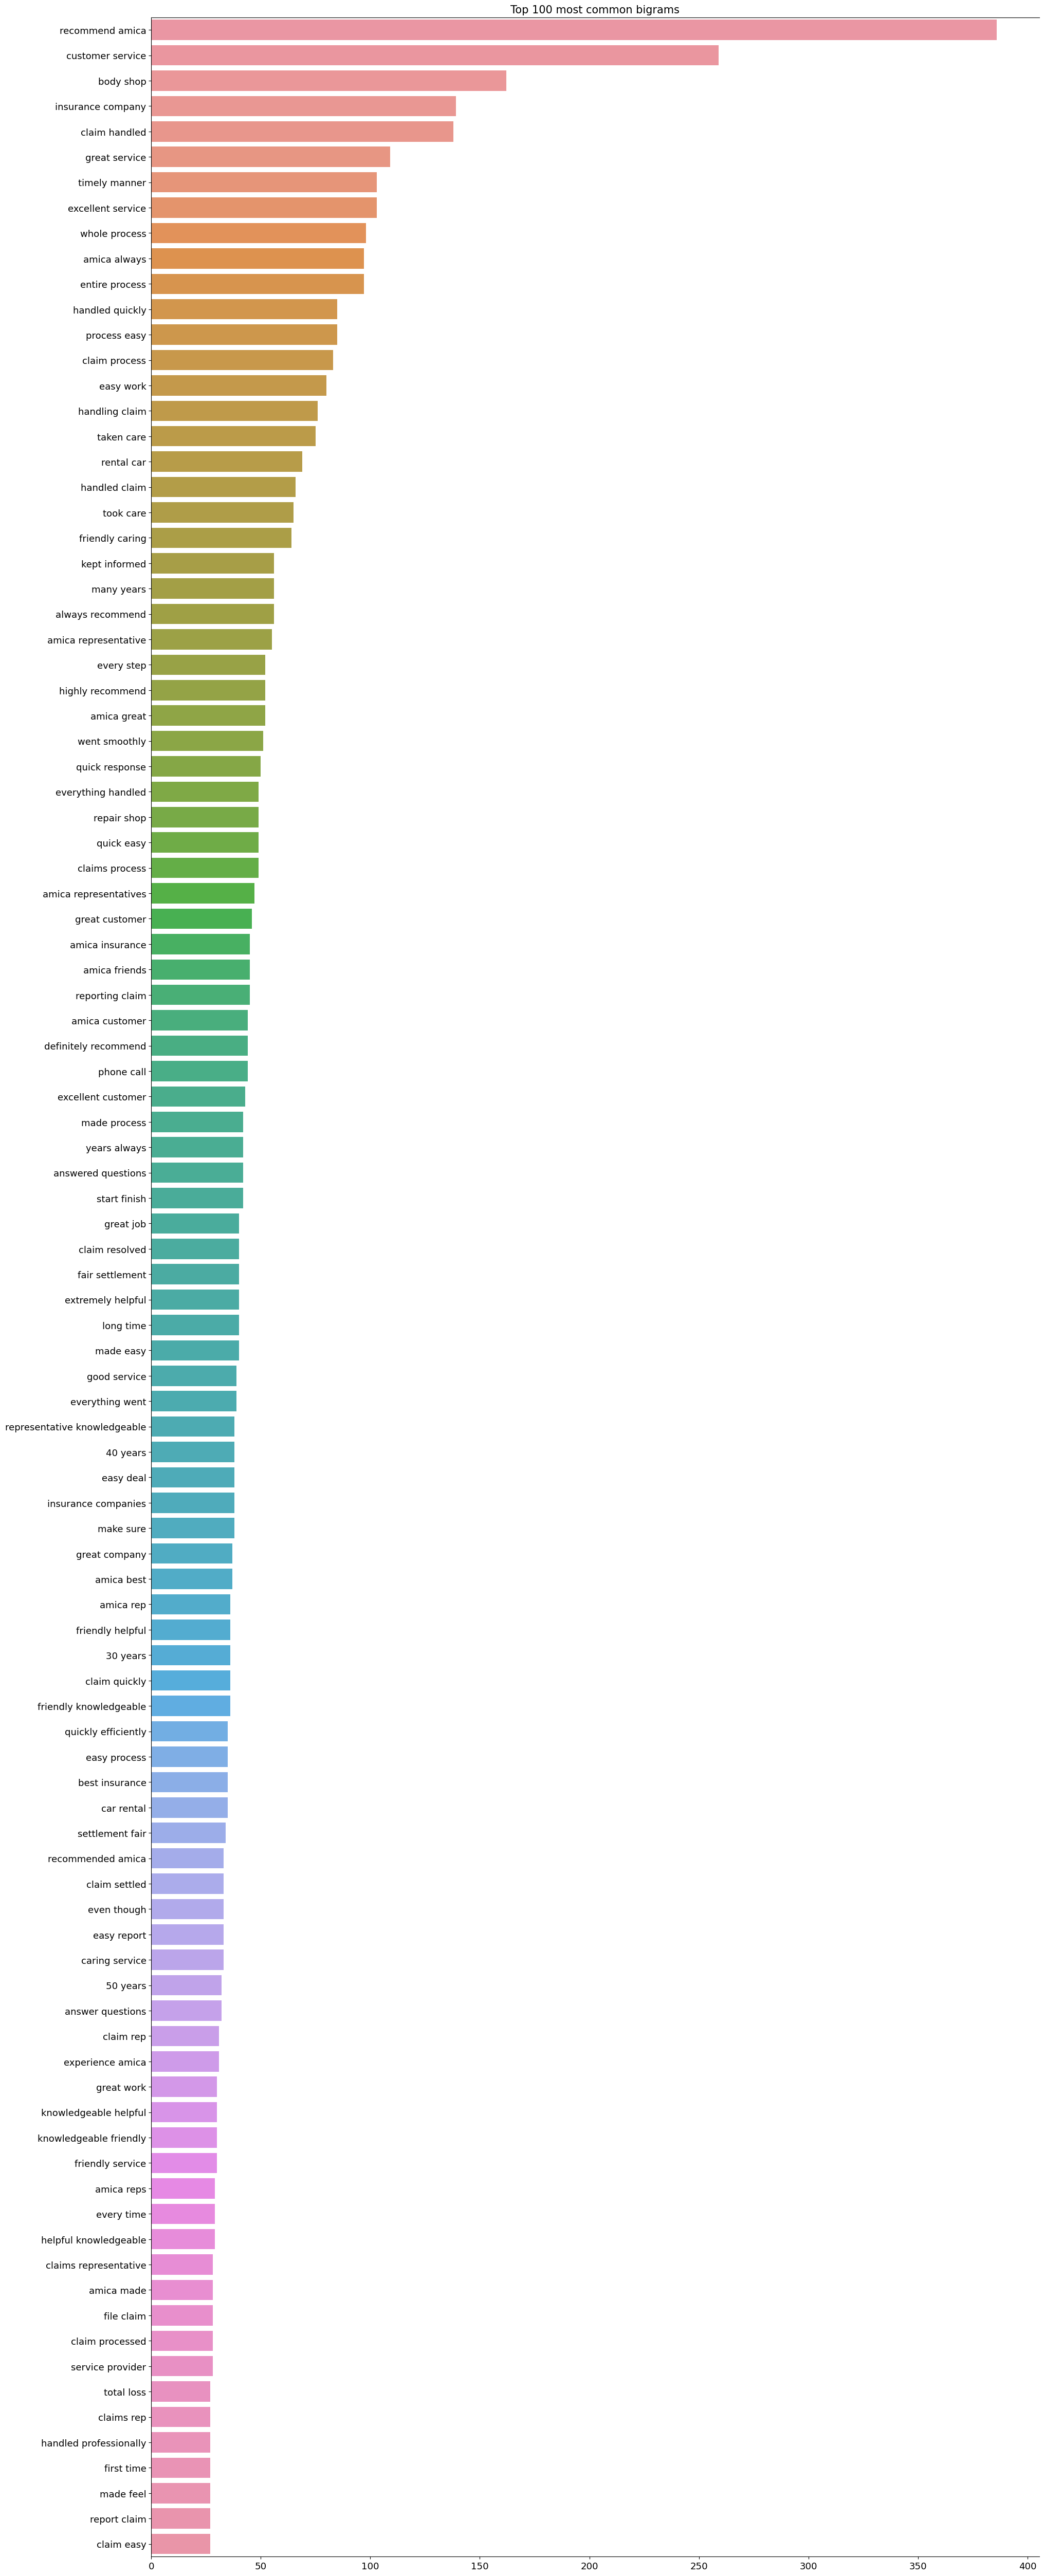

In [303]:
fig, axes = plt.subplots( figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N])

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)

axes.set_title(f'Top {N} most common bigrams', fontsize=15)


plt.show()

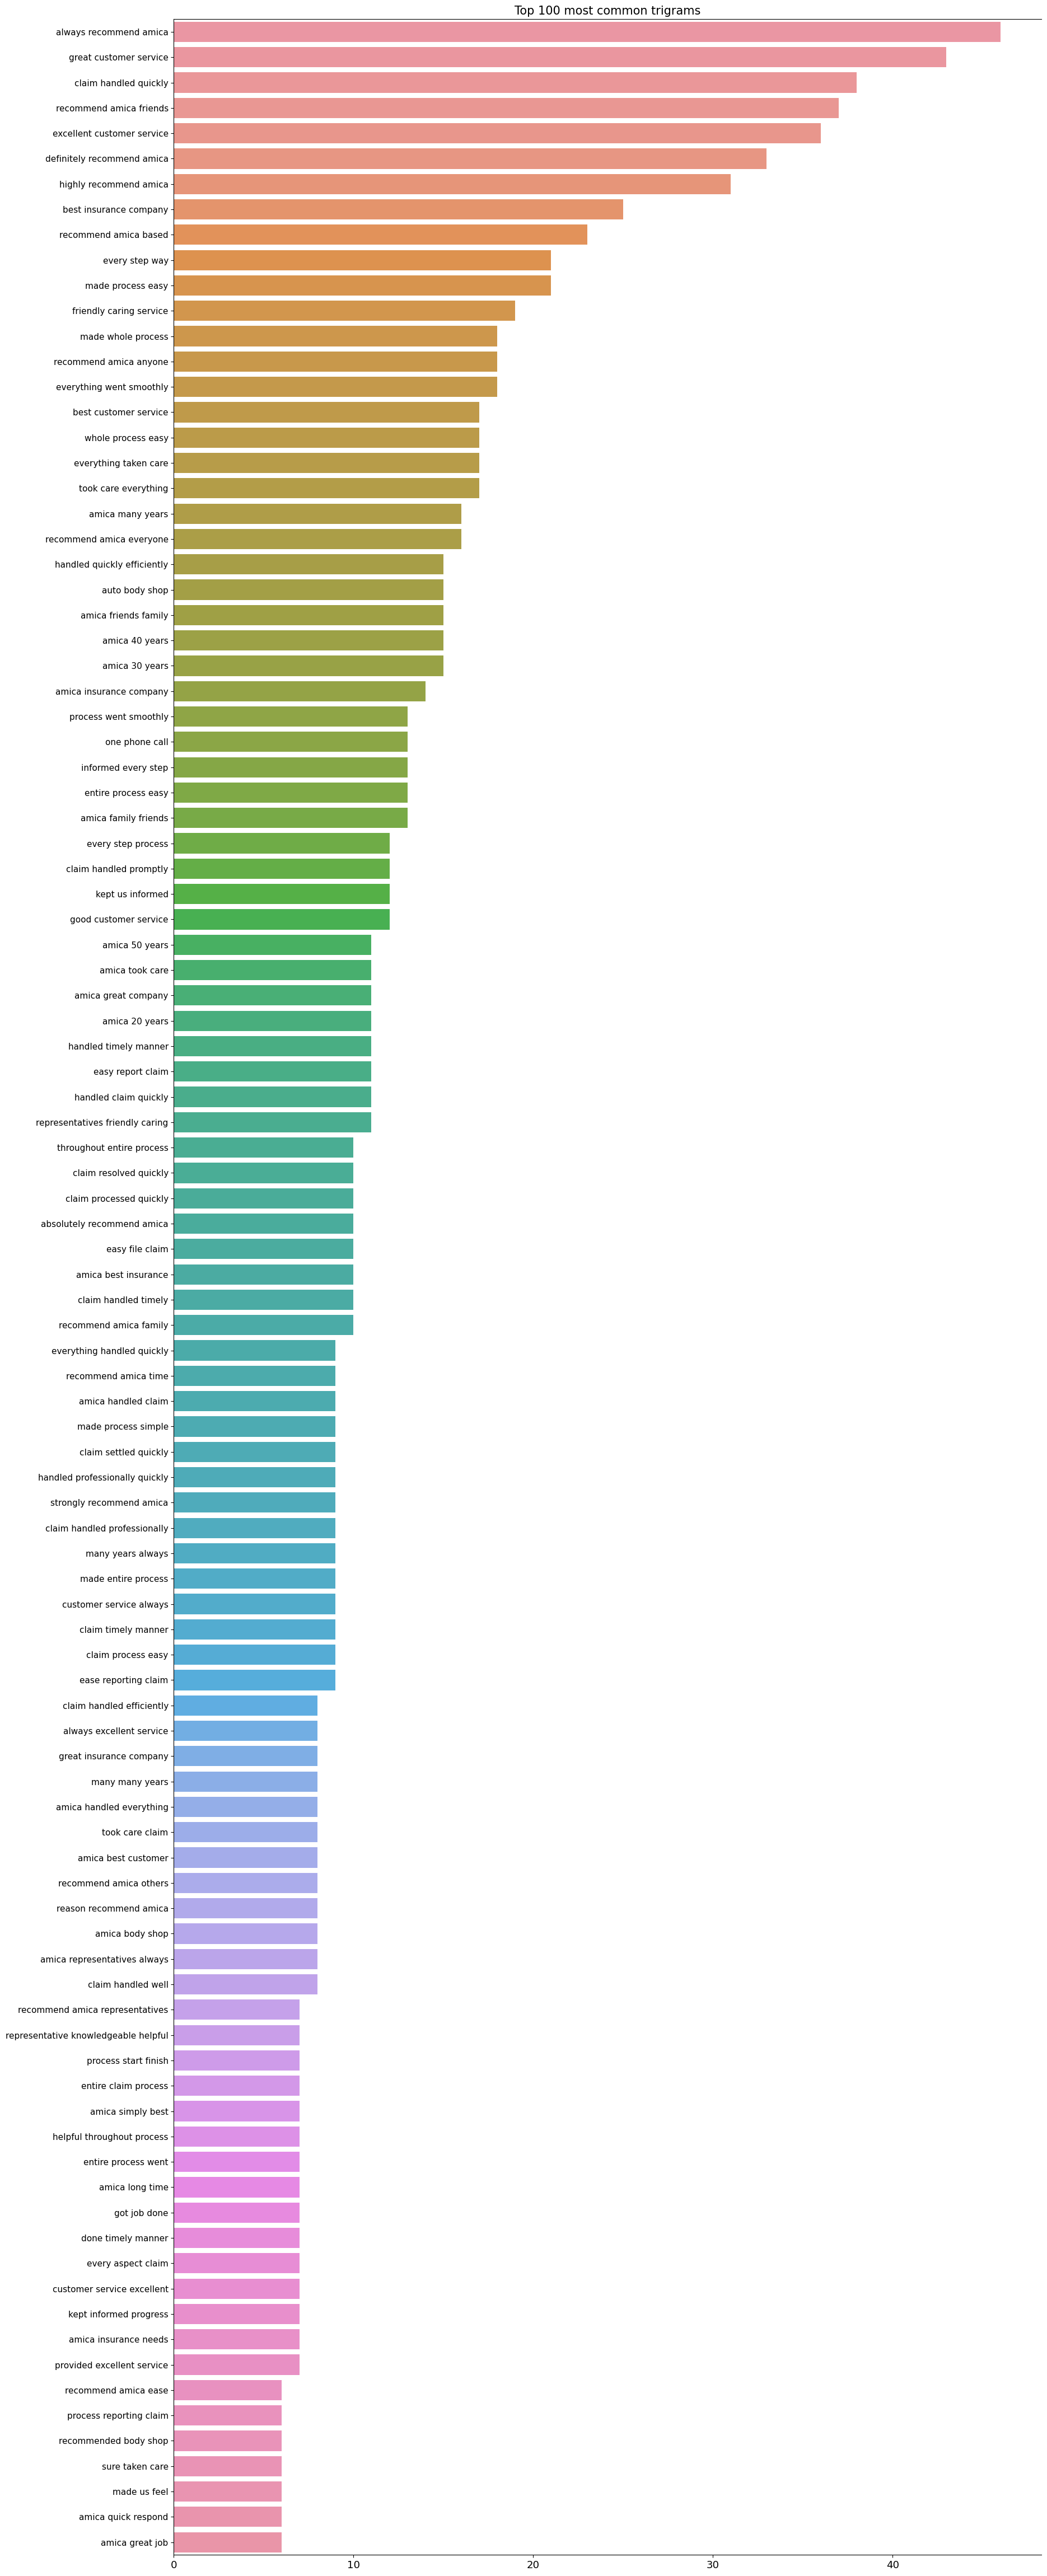

In [304]:
fig, axes = plt.subplots(figsize=(20, 60), dpi=100)

sns.barplot(y=df_trigrams[0].values[:N], x=df_trigrams[1].values[:N])

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=11)

axes.set_title(f'Top {N} most common trigrams', fontsize=15)


plt.show()

# Vectorization/Embedding
- words must be converted into vectors that ml algorithms can understand

## Stemming
- process of reducing a word into its stem or root form ex. fish, fishes, fishing = fish 

## Pretrained Embeddings 
- GloVe
- FastText

In [347]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words = 'english',ngram_range=(1,3))
train_vect = tfidf.fit_transform(df_other['Comments'])
print(train_vect)

  (0, 376)	0.2584184275729459
  (0, 779)	0.2584184275729459
  (0, 185)	0.2584184275729459
  (0, 281)	0.2584184275729459
  (0, 155)	0.2584184275729459
  (0, 375)	0.2584184275729459
  (0, 778)	0.2584184275729459
  (0, 184)	0.2584184275729459
  (0, 775)	0.23053292154362853
  (0, 280)	0.2584184275729459
  (0, 513)	0.23786776905342472
  (0, 776)	0.17647409474342912
  (0, 822)	0.12203680530958204
  (0, 154)	0.22433139633757654
  (0, 374)	0.20614790768352614
  (0, 777)	0.20998226302410733
  (0, 171)	0.10902037884578691
  (0, 774)	0.22433139633757654
  (0, 279)	0.20998226302410733
  (1, 725)	0.6661073813916779
  (1, 45)	0.4505580569400162
  (1, 724)	0.5943890929197463
  (2, 810)	1.0
  (3, 7)	0.2939502353264889
  (3, 767)	0.2807853766846171
  :	:
  (676, 171)	0.3274781090619524
  (677, 562)	0.5475068042542791
  (677, 561)	0.5475068042542791
  (677, 183)	0.2574994357018948
  (677, 450)	0.2574994357018948
  (677, 644)	0.23702185977288995
  (677, 140)	0.22353362532878274
  (677, 322)	0.15678810334

In [348]:
words = tfidf.get_feature_names()
print(words)

['10', '100', '100 fault', '20', '20 years', '215', '25', '25 years', '30', '30 years', '35', '35 years', '40', '40 plus', '40 plus years', '40 years', '50', '50 years', '50 years amica', '80s', '90', 'aaa', 'able', 'absolutely', 'absolutely recommend', 'absolutely recommend amica', 'accident', 'accident forgiveness', 'accidents', 'account', 'accurate', 'action', 'actual', 'actually', 'additional', 'additional deductible', 'address', 'adjuster', 'agent', 'agents', 'ago', 'agreed', 'allow', 'amazing', 'america', 'amica', 'amica 20', 'amica 20 years', 'amica 40', 'amica based', 'amica best', 'amica claim', 'amica company', 'amica customer', 'amica excellent', 'amica fair', 'amica family', 'amica family friends', 'amica fine', 'amica friends', 'amica friends family', 'amica good', 'amica great', 'amica great job', 'amica insurance', 'amica insurance company', 'amica looking', 'amica people', 'amica positive', 'amica process', 'amica professional', 'amica reasonable', 'amica reasonable res

In [349]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [350]:
# elbow method
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_vect)
    sum_of_squared_distances.append(km.inertia_)

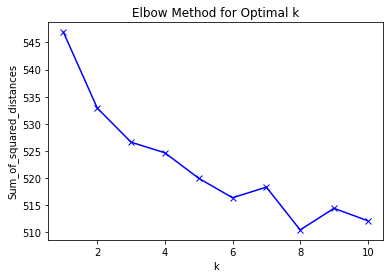

In [351]:
import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [352]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(train_vect)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-4:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : previous, question, comment
1 : recommend, recommend amica, amica
2 : claim, process, time
3 : great, experience, experience amica
4 : amica, company, insurance
5 : service, customer service, customer
